In [1]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers.core import Dense, Dropout, Activation, Reshape
from keras import callbacks

TensorFlow version: 2.2.0


In [2]:
xTemp = np.zeros((1060, 6, 340, 444))
with open("C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\DetectionDatasetFinal\\TrainingA_1-1060.npy", 'rb') as f1:
        xTemp = np.load(f1)

In [3]:
yTemp = np.zeros((1060))
for i in range (1060):
    if (i%2==0):
        yTemp[i] = 0
    else:
        yTemp[i] = 1

In [4]:
x = np.zeros((1060, 6, 340, 444))
y = np.zeros((1060))

permutations = np.random.permutation(1060)
for i in range (1060):
    x[i] = xTemp[permutations[i]]
    y[i] = yTemp[permutations[i]]

In [5]:
x = np.reshape(x, (1060, 340, 444, 6))
y = y.astype(int)
img_shape = (340, 444, 6)

In [6]:
unitsChoices = [16, 32, 64, 128, 256]
poolSizes = [3, 5]
batchSizes = [4, 8, 16, 32]
nbEpochs = [9, 10, 11, 12]
learnRates = [1e-3, 1e-4, 1e-5]

In [7]:
img = layers.Input(shape=img_shape)

conv1 = layers.Conv2D(unitsChoices[4], (poolSizes[1], poolSizes[1]), padding='same', activation='relu', strides=5)(img)
bn1 = layers.BatchNormalization()(conv1)
maxPooling1 = layers.MaxPooling2D(padding='same')(bn1)

conv2 = layers.Conv2D(unitsChoices[2], (poolSizes[1], poolSizes[1]), padding='same', activation='elu', strides=5)(maxPooling1)
bn2 = layers.BatchNormalization()(conv2)
maxPooling2 = layers.MaxPooling2D(padding='same')(bn2)

conv3 = layers.Conv2D(unitsChoices[2], (poolSizes[1], poolSizes[1]), padding='same', activation='elu', strides=3)(maxPooling2)
bn3 = layers.BatchNormalization()(conv3)
maxPooling3 = layers.MaxPooling2D(padding='same')(bn3)

conv4 = layers.Conv2D(unitsChoices[4], (poolSizes[0], poolSizes[0]), padding='same', activation='elu', strides=3)(maxPooling3)
bn4 = layers.BatchNormalization()(conv4)
maxPooling4 = layers.MaxPooling2D(padding='same')(bn4)

conv5 = layers.Conv2D(unitsChoices[1], (poolSizes[0], poolSizes[0]), padding='same', activation='elu', strides=3)(maxPooling4)
maxPooling5 = layers.MaxPooling2D(padding='same')(conv5)

flatten = layers.Flatten()(maxPooling5)

dense1 = layers.Dense(unitsChoices[4], activation = "relu")(flatten)
drop2 = layers.Dropout(0.5420313649456072)(dense1)
res = layers.Dense(1, activation='sigmoid')(drop2)

model = Model(img, res)
opt = tf.keras.optimizers.RMSprop(learning_rate=learnRates[2])
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x, y, batch_size = batchSizes[0], epochs = nbEpochs[3])


Epoch 1/12
265/265 [==============================] - 61s 231ms/step - loss: 0.6832 - accuracy: 0.5368
Epoch 2/12
265/265 [==============================] - 50s 189ms/step - loss: 0.6561 - accuracy: 0.5925
Epoch 3/12
265/265 [==============================] - 48s 181ms/step - loss: 0.6345 - accuracy: 0.6311
Epoch 4/12
265/265 [==============================] - 48s 183ms/step - loss: 0.6169 - accuracy: 0.6679
Epoch 5/12
265/265 [==============================] - 49s 183ms/step - loss: 0.5952 - accuracy: 0.6887
Epoch 6/12
265/265 [==============================] - 49s 185ms/step - loss: 0.5837 - accuracy: 0.6896
Epoch 7/12
265/265 [==============================] - 49s 185ms/step - loss: 0.5466 - accuracy: 0.7264
Epoch 8/12
265/265 [==============================] - 49s 186ms/step - loss: 0.5255 - accuracy: 0.7425
Epoch 9/12
265/265 [==============================] - 50s 187ms/step - loss: 0.4875 - accuracy: 0.7858
Epoch 10/12
265/265 [==============================] - 50s 187ms/step - l

In [11]:
model.save_weights("Model2TrainingA-HO-V2.hdf5")

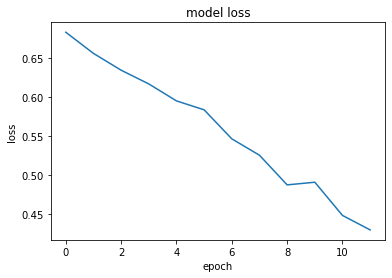

In [12]:
from matplotlib import pyplot as plt
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])

In [13]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 340, 444, 6)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 68, 89, 256)       38656     
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 89, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 45, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 9, 64)          409664    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 9, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 5, 64)          0     